In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

#Set plot style
style.use('ggplot')

In [3]:
#Import stock data and housing data
stock_file = 'Resources/daily_1988to2020_data.csv'
stock_data = pd.read_csv(stock_file,index_col=0)


housing_file = 'Resources/housing_data.csv'
housing_data = pd.read_csv(housing_file,index_col=0)
housing_data.set_index('date',inplace=True)

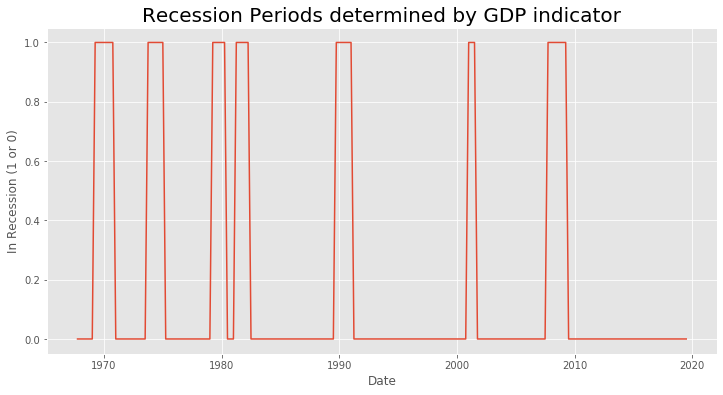

In [4]:
#Import GDP indicated recession data
GDP_recession_file = 'Resources/GDP_indicated_recessions.csv'
GDP_recession_data = pd.read_csv(GDP_recession_file,index_col=0)
GDP_recession_data.rename(columns={'JHDUSRGDPBR':'In Recession (1 or 0)'},inplace=True)
GDP_recession_data.index = [pd.to_datetime(x) for x in GDP_recession_data.index]

#Plot recession dates and length as determined by GDP indicator

fig,ax1 = plt.subplots(figsize=(12,6))
ax1.plot(GDP_recession_data.index,GDP_recession_data['In Recession (1 or 0)'])
ax1.set_xlabel('Date')
ax1.set_ylabel('In Recession (1 or 0)')
ax1.set_title('Recession Periods determined by GDP indicator',fontsize=20)
plt.savefig('Images/Recession Periods determined by GDP indicator.png')

In [5]:
#Calculate average recession length
recession_lengths = []
for x in range(len(GDP_recession_data)):
    if GDP_recession_data['In Recession (1 or 0)'][x] == 1:
        if GDP_recession_data['In Recession (1 or 0)'][x-1] == 0:
            recession_start_date = GDP_recession_data.index[x]
        elif GDP_recession_data['In Recession (1 or 0)'][x+1] == 0:
            recession_end_date = GDP_recession_data.index[x]
            recession_length = (recession_end_date - recession_start_date).days
            recession_lengths.append(recession_length)
            
recession_length_average = sum(recession_lengths)/len(recession_lengths)
recession_length_average_months = round(recession_length_average/30)

print(f'Average recession length based on GDP indicated recessions is {recession_length_average_months} months')

Average recession length based on GDP indicated recessions is 14 months


In [6]:
recession_start_dates = []
for x in range(len(GDP_recession_data)):
    if GDP_recession_data['In Recession (1 or 0)'][x] == 1:
        if GDP_recession_data['In Recession (1 or 0)'][x-1] == 0:
            recession_start_date = GDP_recession_data.index[x]
            recession_start_dates.append(recession_start_date)
print(f'Three most recent recession dates:\n{recession_start_dates[-1:-4:-1]}')

Three most recent recession dates:
[Timestamp('2007-10-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('1989-10-01 00:00:00')]


In [7]:
#Calculate stock return after investing 10 months after recession start for 2008, 2000, 1990 for 3 years
stock_data_1990 = stock_data['1990-08-01':'1993-08-01']
stock_data_1990_investment = (stock_data_1990['Close'][-1]-stock_data_1990['Close'][0])/stock_data_1990['Close'][0]*100

stock_data_dotcom = stock_data['2001-11-01':'2004-11-01']
stock_data_dotcom_investment = (stock_data_dotcom['Close'][-1]-stock_data_dotcom['Close'][0])/stock_data_dotcom['Close'][0]*100

stock_data_2008 = stock_data['2008-08-01':'2011-08-01']
stock_data_2008_investment = (stock_data_2008['Close'][-1]-stock_data_2008['Close'][0])/stock_data_2008['Close'][0]*100

average_return_stocks = sum([stock_data_1990_investment,stock_data_dotcom_investment,stock_data_2008_investment])/3
average_return_stocks

23.88789689732738

In [8]:
#Calculate housing return after investing 10 months after recession start for 2008, 2000, 1990 for 3 years
housing_data_1990 = housing_data['1990-08-01':'1993-08-01']
housing_data_1990_investment = (housing_data_1990['avg_price'][-1]-housing_data_1990['avg_price'][0])/housing_data_1990['avg_price'][0]*100

housing_data_dotcom = housing_data['2001-11-01':'2004-11-01']
housing_data_dotcom_investment = (housing_data_dotcom['avg_price'][-1]-housing_data_dotcom['avg_price'][0])/housing_data_dotcom['avg_price'][0]*100

housing_data_2008 = housing_data['2008-08-01':'2011-08-01']
housing_data_2008_investment = (housing_data_2008['avg_price'][-1]-housing_data_2008['avg_price'][0])/housing_data_2008['avg_price'][0]*100

average_return_housing = sum([housing_data_1990_investment,housing_data_dotcom_investment,housing_data_2008_investment])/3
average_return_housing

20.069453071086002

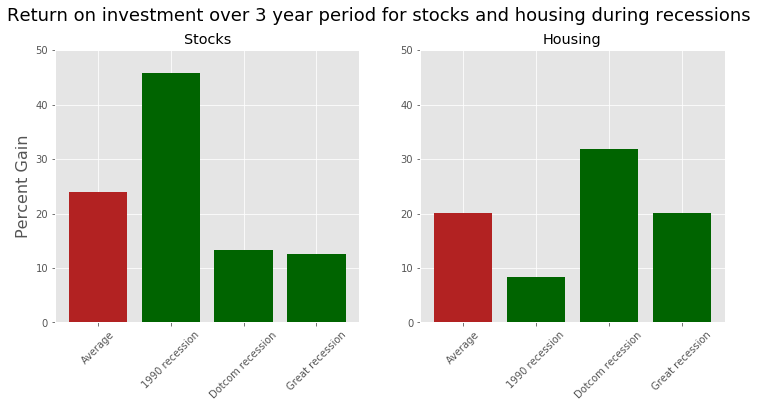

In [63]:
#Plot Percent gains for stock and housing with average percent gain highlighted
fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
labels = ['Average','1990 recession','Dotcom recession','Great recession']
ax1.bar(labels,[average_return_stocks,stock_data_1990_investment,stock_data_dotcom_investment,stock_data_2008_investment],color=['firebrick','darkgreen','darkgreen','darkgreen'])
ax1.set_title('Stocks')
ax1.set_ylabel('Percent Gain',fontsize=16)
ax1.set_ylim([0,50])

ax2.bar(labels,[average_return_housing,housing_data_1990_investment,housing_data_dotcom_investment,housing_data_2008_investment],color=['firebrick','darkgreen','darkgreen','darkgreen'])
ax2.set_title('Housing')
ax2.set_ylim([0,50])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

fig.suptitle('Return on investment over 3 year period for stocks and housing during recessions', fontsize=18)
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('Images/returns on investment for stocks and housing')
